# Data Management Algorithm for Decision Making in Clash Royale

## Project Title
**Analyzing User Behavior in Clash Royale for Strategic Decision Making**

## Project Rationale
This project aims to leverage advanced data management algorithms to analyze user behavior in the popular mobile game Clash Royale.<br>
By utilizing datasets obtained from Kaggle, we will explore how different user behaviors impact game outcomes.<br>
The goal is to apply techniques learned in the course to understand which behaviors lead to winning, prolonged gameplay, and frequent app usage.

we will focuses on handling various steps in the data-driven decision-making process, including data integration, cleaning, and exploration.<br>
In this project we will address common data issues such as missing data, dirty or inconsistent data, and bias, ensuring trustworthy decision-making.

## Data Description
We will use the following datasets:
1. **BattlesStaging_01012021_WL_tagged.csv**: Contains data on games played on January 1, 2021. each row present 1 game between 2 players.
2. **Wincons.csv**: Contains information about impactful cards in the game.
3. **clash_royal_data.csv**: Contains specific card data, including ratings and usage statistics.

### Columns in BattlesStaging_01012021_WL_tagged.csv
- `Unnamed: 0`: Index
- `battleTime`: The time the battle started
- `arena.id`: The ID of the arena where the battle took place
- `gameMode.id`: The ID of the game mode
- `average.startingTrophies`: The average starting trophies of both players
- `winner.tag`: The tag of the winning player
- `winner.startingTrophies`: The starting trophies of the winning player
- `winner.trophyChange`: The change in trophies for the winning player
- `winner.crowns`: The number of crowns earned by the winning player
- `winner.kingTowerHitPoints`: The hit points of the winning player's king tower
- `winner.princessTowersHitPoints`: The hit points of the winning player's princess towers
- `winner.clan.tag`: The clan tag of the winning player
- `winner.clan.badgeId`: The clan badge ID of the winning player
- `loser.tag`: The tag of the losing player
- `loser.startingTrophies`: The starting trophies of the losing player
- `loser.trophyChange`: The change in trophies for the losing player
- `loser.crowns`: The number of crowns earned by the losing player
- `loser.kingTowerHitPoints`: The hit points of the losing player's king tower
- `loser.clan.tag`: The clan tag of the losing player
- `loser.clan.badgeId`: The clan badge ID of the losing player
- `loser.princessTowersHitPoints`: The hit points of the losing player's princess towers
- `tournamentTag`: The tag of the tournament (if applicable)
- `winner.card1.id` to `winner.card8.id`: The IDs of the winning player's cards
- `winner.card1.level` to `winner.card8.level`: The levels of the winning player's cards
- `winner.cards.list`: The list of cards of the winning player
- `winner.totalcard.level`: The total level of the cards of the winning player
- `winner.troop.count`: The count of troop cards of the winning player
- `winner.structure.count`: The count of structure cards of the winning player
- `winner.spell.count`: The count of spell cards of the winning player
- `winner.common.count`: The count of common cards of the winning player
- `winner.rare.count`: The count of rare cards of the winning player
- `winner.epic.count`: The count of epic cards of the winning player
- `winner.legendary.count`: The count of legendary cards of the winning player
- `winner.elixir.average`: The average elixir cost of the winning player's deck
- `loser.card1.id` to `loser.card8.id`: The IDs of the losing player's cards
- `loser.card1.level` to `loser.card8.level`: The levels of the losing player's cards
- `loser.cards.list`: The list of cards of the losing player
- `loser.totalcard.level`: The total level of the cards of the losing player
- `loser.troop.count`: The count of troop cards of the losing player
- `loser.structure.count`: The count of structure cards of the losing player
- `loser.spell.count`: The count of spell cards of the losing player
- `loser.common.count`: The count of common cards of the losing player
- `loser.rare.count`: The count of rare cards of the losing player
- `loser.epic.count`: The count of epic cards of the losing player
- `loser.legendary.count`: The count of legendary cards of the losing player
- `loser.elixir.average`: The average elixir cost of the losing player's deck

### Columns in Wincons.csv
- `id`: Index
- `card_id`: The ID of the card
- `card_name`: The name of the card

### Columns in clash_royal_data.csv
- `name`: The name of the card
- `Rating`: The rating of the card
- `Usage`: The usage percentage of the card
- `increase_in_usage`: The increase in usage percentage
- `Win`: The win percentage of the card
- `increase_in_win`: The increase in win percentage
- `CWR`: The card win rate



In [44]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx
import os

# Set plot style
sns.set(style="whitegrid")

## Data Integration, Cleaning, and Exploration
We will start by loading the datasets. We will then clean and explore the data to ensure it is ready for analysis.

In [45]:
# Load the main dataset
data_dir = os.path.join(os.getcwd(), 'data')
battles_df = pd.read_csv(os.path.join(data_dir, 'BattlesStaging_01012021_WL_tagged.csv'))

# Load additional datasets
wincons_df = pd.read_csv(os.path.join(data_dir, 'Wincons.csv'))
clash_royal_data_df = pd.read_csv(os.path.join(data_dir, 'clash_royal_data.csv'))

# Display the first few rows of the main dataset
print(battles_df.head())

# Display the columns of the main dataset
print(battles_df.columns)

   Unnamed: 0                 battleTime    arena.id  gameMode.id  \
0           0  2020-12-31 21:02:12+00:00  54000050.0   72000006.0   
1           1  2020-12-31 21:02:15+00:00  54000050.0   72000006.0   
2           2  2020-12-31 21:02:45+00:00  54000050.0   72000006.0   
3           3  2020-12-31 21:03:13+00:00  54000050.0   72000006.0   
4           4  2020-12-31 21:03:17+00:00  54000050.0   72000006.0   

   average.startingTrophies  winner.tag  winner.startingTrophies  \
0                    5363.0   #PVLPJP2Y                   5372.0   
1                    5407.0  #8PRLRYYCV                   5409.0   
2                    5741.0   #2G8LQRCG                   5749.0   
3                    4307.0  #Y9QL09VGV                   4316.0   
4                    5776.5  #9RRYG9P9U                   5783.0   

   winner.trophyChange  winner.crowns  winner.kingTowerHitPoints  ...  \
0                 28.0            2.0                     4145.0  ...   
1                 29.0        


## Explanation of Data Columns

### Columns in `battles_df`
- `Unnamed: 0`: Index
- `battleTime`: The time the battle started
- `arena.id`: The ID of the arena where the battle took place
- `gameMode.id`: The ID of the game mode
- `average.startingTrophies`: The average starting trophies of both players
- `winner.tag`: The tag of the winning player
- `winner.startingTrophies`: The starting trophies of the winning player
- `winner.trophyChange`: The change in trophies for the winning player
- `winner.crowns`: The number of crowns earned by the winning player
- `winner.kingTowerHitPoints`: The hit points of the winning player's king tower
- `winner.princessTowersHitPoints`: The hit points of the winning player's princess towers
- `winner.clan.tag`: The clan tag of the winning player
- `winner.clan.badgeId`: The clan badge ID of the winning player
- `loser.tag`: The tag of the losing player
- `loser.startingTrophies`: The starting trophies of the losing player
- `loser.trophyChange`: The change in trophies for the losing player
- `loser.crowns`: The number of crowns earned by the losing player
- `loser.kingTowerHitPoints`: The hit points of the losing player's king tower
- `loser.clan.tag`: The clan tag of the losing player
- `loser.clan.badgeId`: The clan badge ID of the losing player
- `loser.princessTowersHitPoints`: The hit points of the losing player's princess towers
- `tournamentTag`: The tag of the tournament (if applicable)
- `winner.card1.id` to `winner.card8.id`: The IDs of the winning player's cards
- `winner.card1.level` to `winner.card8.level`: The levels of the winning player's cards
- `winner.cards.list`: The list of cards of the winning player
- `winner.totalcard.level`: The total level of the cards of the winning player
- `winner.troop.count`: The count of troop cards of the winning player
- `winner.structure.count`: The count of structure cards of the winning player
- `winner.spell.count`: The count of spell cards of the winning player
- `winner.common.count`: The count of common cards of the winning player
- `winner.rare.count`: The count of rare cards of the winning player
- `winner.epic.count`: The count of epic cards of the winning player
- `winner.legendary.count`: The count of legendary cards of the winning player
- `winner.elixir.average`: The average elixir cost of the winning player's deck
- `loser.card1.id` to `loser.card8.id`: The IDs of the losing player's cards
- `loser.card1.level` to `loser.card8.level`: The levels of the losing player's cards
- `loser.cards.list`: The list of cards of the losing player
- `loser.totalcard.level`: The total level of the cards of the losing player
- `loser.troop.count`: The count of troop cards of the losing player
- `loser.structure.count`: The count of structure cards of the losing player
- `loser.spell.count`: The count of spell cards of the losing player
- `loser.common.count`: The count of common cards of the losing player
- `loser.rare.count`: The count of rare cards of the losing player
- `loser.epic.count`: The count of epic cards of the losing player
- `loser.legendary.count`: The count of legendary cards of the losing player
- `loser.elixir.average`: The average elixir cost of the losing player's deck
- `deck_elixir_variability`: The variability in elixir cost between the winner and loser
- `winner_trophy_eff`: The trophy efficiency of the winner
- `loser_trophy_eff`: The trophy efficiency of the loser
- `winner_card_level_std`: The standard deviation of the levels of the winner's cards
- `loser_card_level_std`: The standard deviation of the levels of the loser's cards
- `winner_spell_troop_ratio`: The ratio of spell cards to troop cards for the winner
- `loser_spell_troop_ratio`: The ratio of spell cards to troop cards for the loser
- `elixir_gap`: The difference in average elixir cost between the winner and loser
- `winner_rarity_diversity`: The diversity of card rarities in the winner's deck
- `loser_rarity_diversity`: The diversity of card rarities in the loser's deck
- `princess_tower_gap`: The difference in princess tower hit points between the winner and loser
- `win_streak_proxy`: A proxy for the winner's win streak
- `winner_has_legendary`: Whether the winner has legendary cards
- `loser_has_legendary`: Whether the loser has legendary cards
- `clan_advantage`: Whether the winner has a clan advantage
- `elixir_advantage`: Whether the winner has an elixir advantage
- `balanced_deck_winner`: Whether the winner has a balanced deck
- `balanced_deck_loser`: Whether the loser has a balanced deck
- `underleveled_winner`: Whether the winner is underleveled for the arena
- `underleveled_loser`: Whether the loser is underleveled for the arena
- `crown_dominance`: Whether the winner has crown dominance
- `tournament_participant`: Whether the player is a tournament participant

### Columns in `wincons_df`
- `id`: Index
- `card_id`: The ID of the card
- `card_name`: The name of the card
```

## Feature Engineering
We will create new features to enhance our analysis. This includes calculating the elixir variability, trophy efficiency, and other metrics that can help us understand the factors influencing game outcomes.

In the next section, we create new features to enhance our analysis. These features include:

- `deck_elixir_variability`: Measures the variability in elixir cost between the winner and loser.
- `winner_trophy_eff` and `loser_trophy_eff`: Calculate the trophy efficiency for the winner and loser, respectively.
- `winner_card_level_std` and `loser_card_level_std`: Calculate the standard deviation of the levels of the winner's and loser's cards.
- `winner_spell_troop_ratio` and `loser_spell_troop_ratio`: Calculate the ratio of spell cards to troop cards for the winner and loser.
- `elixir_gap`: Measures the difference in average elixir cost between the winner and loser.
- `winner_rarity_diversity` and `loser_rarity_diversity`: Measure the diversity of card rarities in the winner's and loser's decks.
- `princess_tower_gap`: Measures the difference in princess tower hit points between the winner and loser.
- `win_streak_proxy`: A proxy for the winner's win streak.
- `winner_has_legendary` and `loser_has_legendary`: Indicate whether the winner or loser has legendary cards.
- `clan_advantage`: Indicates whether the winner has a clan advantage.
- `elixir_advantage`: Indicates whether the winner has an elixir advantage.
- `balanced_deck_winner` and `balanced_deck_loser`: Indicate whether the winner or loser has a balanced deck.
- `underleveled_winner` and `underleveled_loser`: Indicate whether the winner or loser is underleveled for the arena.
- `crown_dominance`: Indicates whether the winner has crown dominance.
- `tournament_participant`: Indicates whether the player is a tournament participant.

These features help us understand the factors influencing game outcomes by providing more detailed metrics on player performance, deck composition, and game dynamics.

A Directed Acyclic Graph (DAG) is a graph with directed edges and no cycles. It helps visualize the relationships between features and their influence on the target variable.

To create the DAG, we:
1. Add nodes representing the features.
2. Add edges based on assumed relationships between features.

We create the DAG this way to visualize and analyze the dependencies and interactions between features, helping us understand their impact on the target variable (winning).

## TODO

Create edge with correct directions (A->B is different than B->A), use correlation heat map to understand the right direction

1. need to create coreletion matrix and show the heat-map.
2. understand what effect what.
3. create edges according to our understanding.



In [ ]:
# Create a function to add features to the DataFrame
def add_features(battles_df):
    battles_df['battleTime'] = pd.to_datetime(battles_df['battleTime'])
    numeric_cols = [
        'winner.princessTowersHitPoints', # how much damage the winner's princess towers have taken
        'loser.princessTowersHitPoints', # how much damage the loser's princess towers have taken
        'winner.startingTrophies', # number of trophies the winner had at the start of the battle
        'loser.startingTrophies',
        'winner.trophyChange',
        'loser.trophyChange',
        'winner.elixir.average',
        'loser.elixir.average'
    ]
    
    # change all numeric columns to float so we can manipulate them
    for col in numeric_cols:
        battles_df[col] = (
            battles_df[col].astype(str)
            .str.replace(',', '.', regex=False)  # Handle European decimal formats
            .str.replace('[^0-9.]', '', regex=True)  # Remove non-numeric characters
            .replace('', np.nan)  # Convert empty strings to NaN
        )
        battles_df[col] = pd.to_numeric(battles_df[col], errors='coerce')
    
    battles_df['deck_elixir_variability'] = battles_df[['winner.elixir.average', 'loser.elixir.average']].std(axis=1) # how much the elixir averages varied between the two players
    battles_df['winner_trophy_eff'] = battles_df['winner.trophyChange'] / battles_df['winner.startingTrophies']
    battles_df['loser_trophy_eff'] = battles_df['loser.trophyChange'].abs() / battles_df['loser.startingTrophies']
    winner_card_levels = [f'winner.card{i}.level' for i in range(1,9)]
    loser_card_levels = [f'loser.card{i}.level' for i in range(1,9)]
    battles_df['winner_card_level_std'] = battles_df[winner_card_levels].std(axis=1)
    battles_df['loser_card_level_std'] = battles_df[loser_card_levels].std(axis=1)
    battles_df['winner_spell_troop_ratio'] = battles_df['winner.spell.count'] / battles_df['winner.troop.count']
    battles_df['loser_spell_troop_ratio'] = battles_df['loser.spell.count'] / battles_df['loser.troop.count']
    battles_df['elixir_gap'] = battles_df['winner.elixir.average'] - battles_df['loser.elixir.average']
    rarities = ['common', 'rare', 'epic', 'legendary']
    battles_df['winner_rarity_diversity'] = battles_df[[f'winner.{r}.count' for r in rarities]].gt(0).sum(axis=1)
    battles_df['loser_rarity_diversity'] = battles_df[[f'loser.{r}.count' for r in rarities]].gt(0).sum(axis=1)
    battles_df['princess_tower_gap'] = battles_df['winner.princessTowersHitPoints'] - battles_df['loser.princessTowersHitPoints']
    battles_df['win_streak_proxy'] = battles_df['winner.trophyChange'] / 50
    battles_df['winner_has_legendary'] = battles_df['winner.legendary.count'].gt(0).astype(int)
    battles_df['loser_has_legendary'] = battles_df['loser.legendary.count'].gt(0).astype(int)
    battles_df['clan_advantage'] = ((battles_df['winner.clan.tag'].notna()) & (battles_df['loser.clan.tag'].isna())).astype(int)
    battles_df['elixir_advantage'] = battles_df['winner.elixir.average'].gt(battles_df['loser.elixir.average']).astype(int)
    battles_df['balanced_deck_winner'] = ((battles_df['winner.troop.count'] > 2) & (battles_df['winner.spell.count'] > 1) & (battles_df['winner.structure.count'] > 0)).astype(int)
    battles_df['balanced_deck_loser'] = ((battles_df['loser.troop.count'] > 2) & (battles_df['loser.spell.count'] > 1) & (battles_df['loser.structure.count'] > 0)).astype(int)
    arena_mean = battles_df.groupby('arena.id')['winner.totalcard.level'].transform('mean')
    battles_df['underleveled_winner'] = (battles_df['winner.totalcard.level'] < arena_mean).astype(int)
    arena_mean_loser = battles_df.groupby('arena.id')['loser.totalcard.level'].transform('mean')
    battles_df['underleveled_loser'] = (battles_df['loser.totalcard.level'] < arena_mean_loser).astype(int)
    battles_df['crown_dominance'] = battles_df['winner.crowns'].ge(2).astype(int)
    battles_df['tournament_participant'] = battles_df['tournamentTag'].notna().astype(int)

    return battles_df

# Apply the add_features function to the DataFrame
battles_df = add_features(battles_df)


# Calculate the correlation matrix for the specified features
correlation_matrix = battles_df.corr()


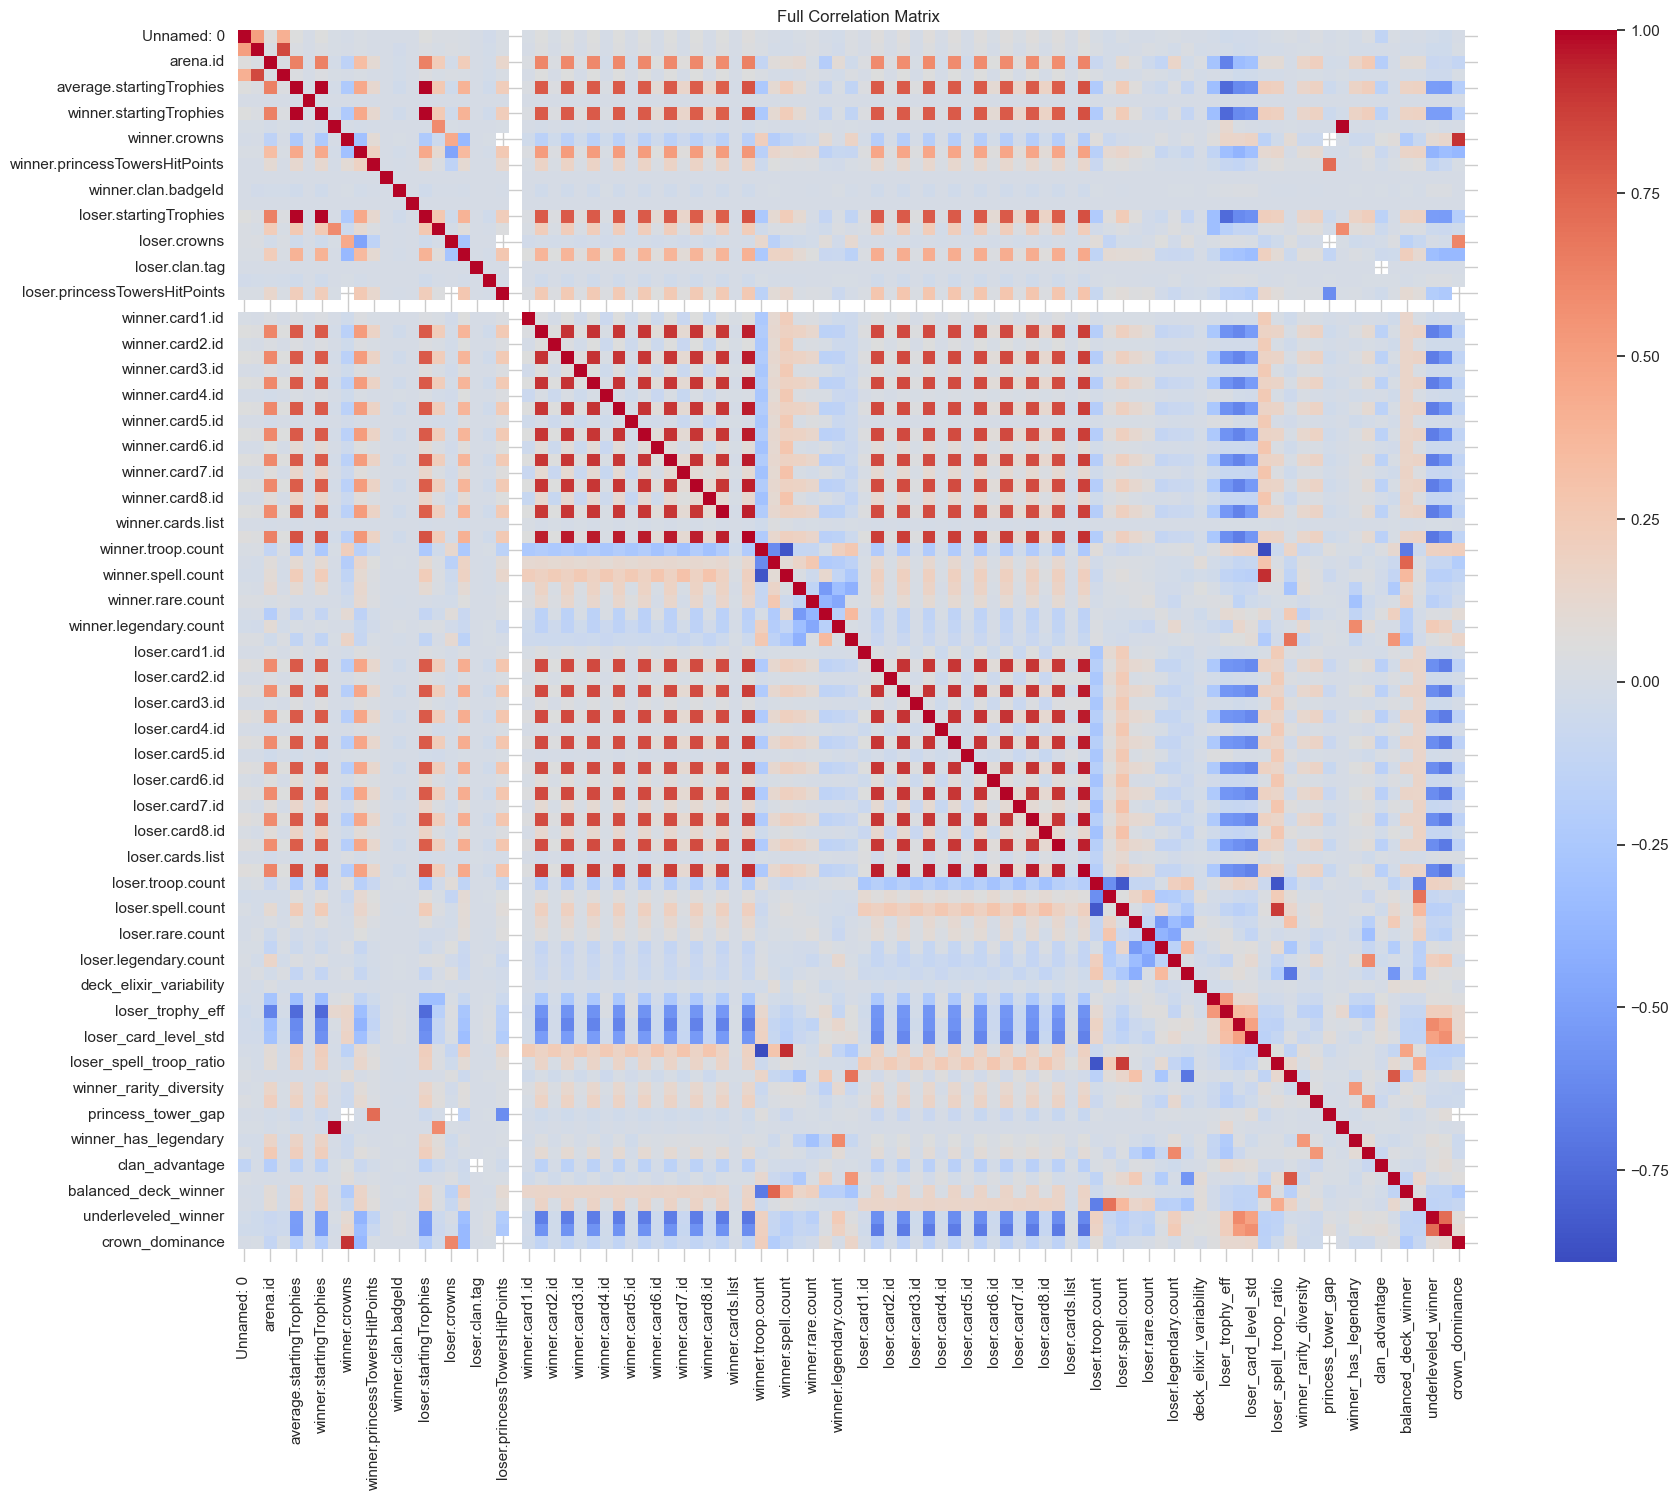

In [89]:
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Full Correlation Matrix')
plt.show()

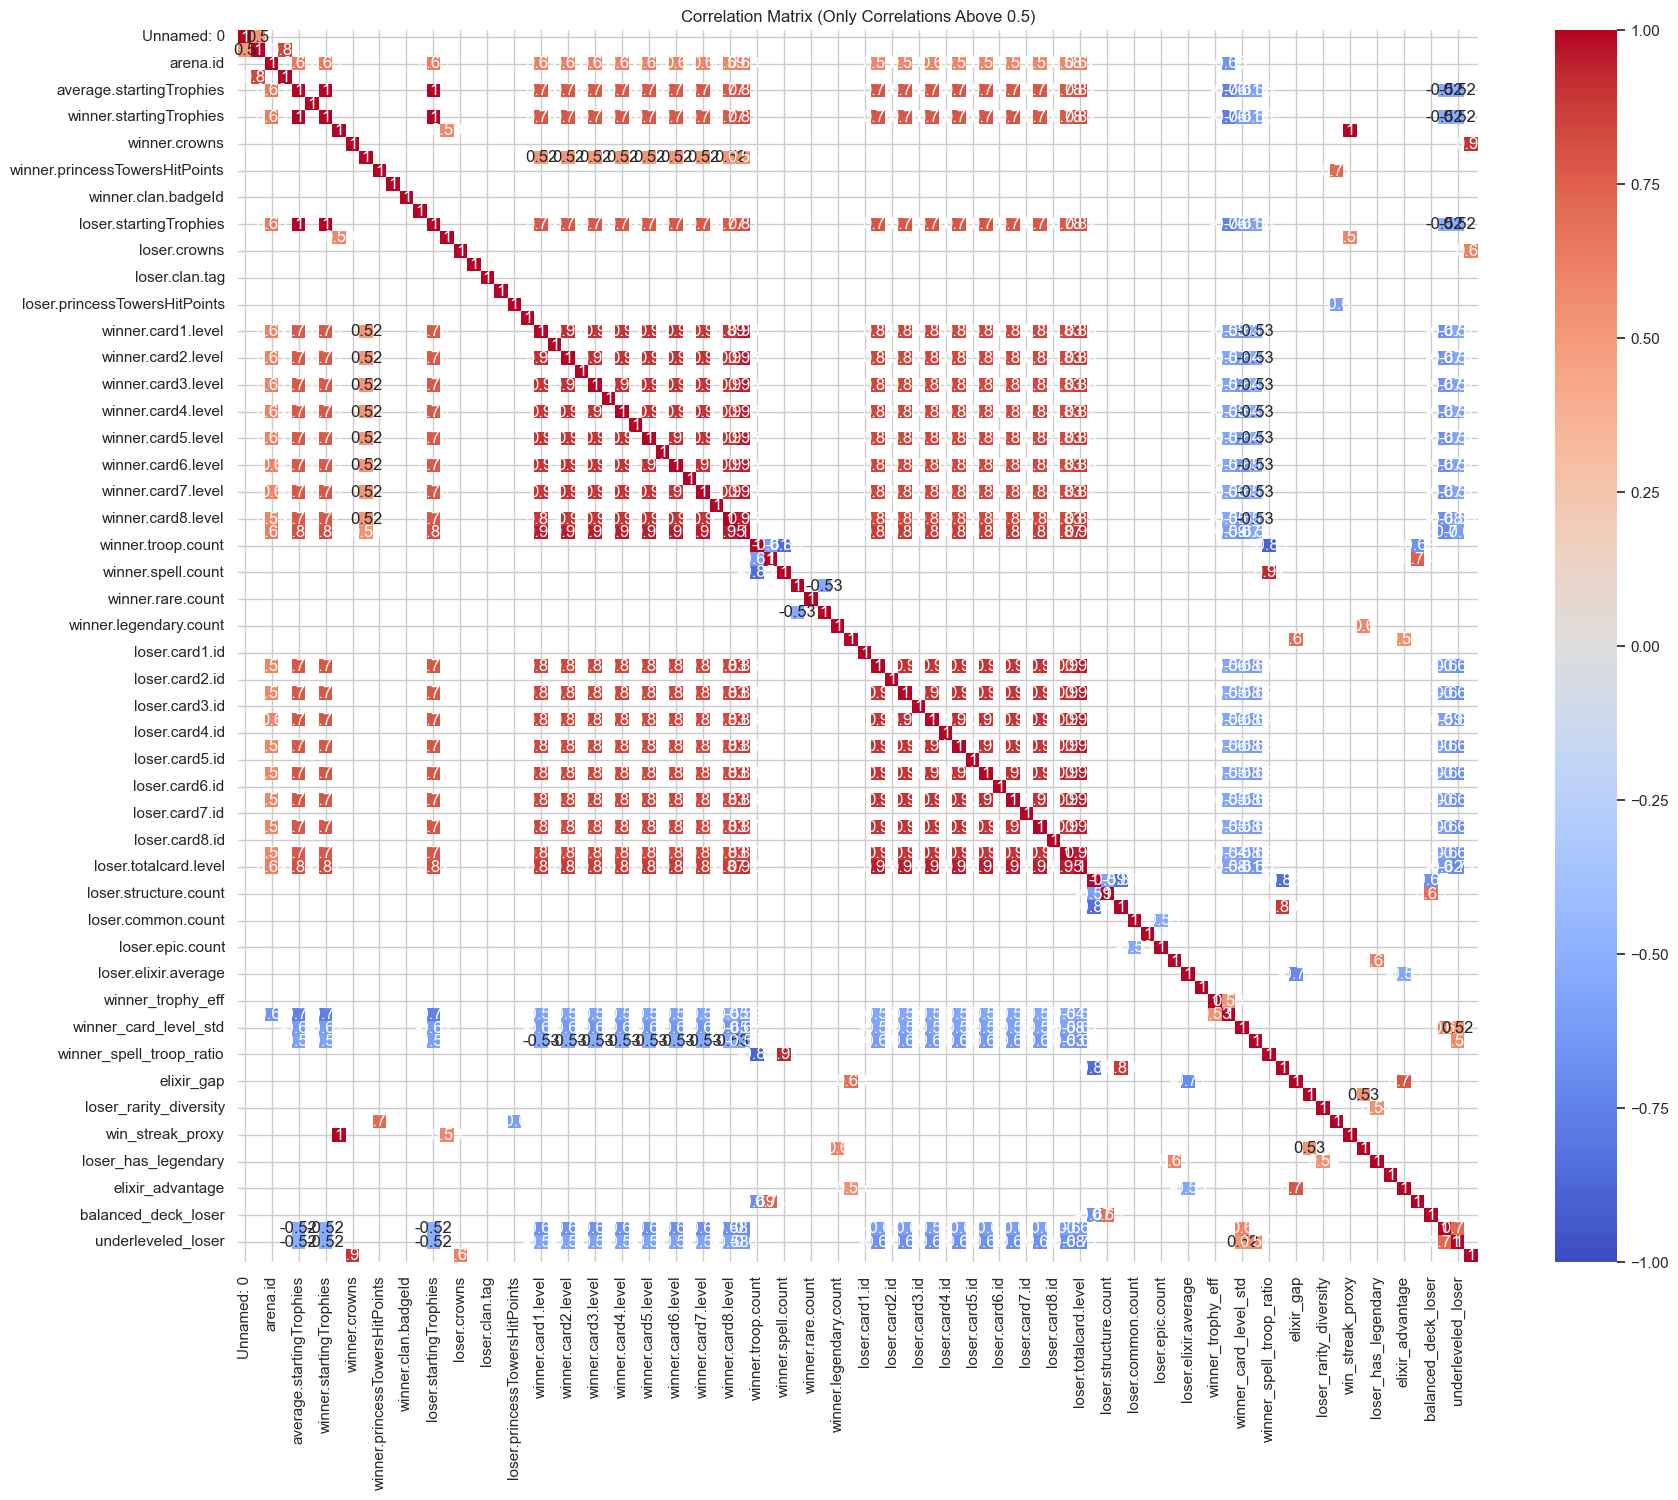

In [ ]:
# Define a function to plot a heatmap for a subset of the correlation matrix



```markdown
## Correlation Analysis

In the previous section, we identified the features of interest and examined their correlations with other features. This helped us understand the general relationships and influences between specific features. 

Now, we will extend our analysis to include the entire correlation matrix. By examining the full correlation matrix, we can gain a comprehensive understanding of how all features interact with each other. This will allow us to identify additional patterns and relationships that may not have been apparent when focusing solely on the features of interest.

The full correlation matrix will provide valuable insights into the dependencies and interactions between various features, helping us to better understand the factors that influence player performance and game outcomes.
```

In [ ]:
# Display the full correlation matrix

# # Display the first few rows of the modified DataFrame
# print(battles_df.head())


# Calculate the correlation matrix for the specified features
features_of_interest = [
    'winner.time_until_now', 'loser.time_until_now',
    'winner.Total_time_played', 'loser.Total_time_played'
]


# Filter the correlation matrix to show only the correlations with features of interest
correlation_with_interest = correlation_matrix.loc[features_of_interest, :]

# Display the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_with_interest, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix with Features of Interest')
plt.show()

```markdown
## Creating a Directed Acyclic Graph (DAG) Based on Correlation

In the previous sections, we analyzed the correlation between various features in our dataset. Now, we want to create a Directed Acyclic Graph (DAG) based on these correlations. The DAG will help us visualize and understand the relationships and dependencies between different features.

### Steps to Create the DAG:
1. **Identify Strong Correlations**: We will use the correlation matrix to identify strong correlations between features. These correlations will form the basis for the edges in our DAG.
2. **Add Nodes**: Each feature will be represented as a node in the DAG.
3. **Add Edges**: Directed edges will be added between nodes based on the strength and direction of the correlations. An edge from node A to node B indicates that feature A influences feature B.
4. **Visualize the DAG**: We will use a graph visualization library to draw the DAG and analyze the relationships between features.

By creating the DAG, we can gain insights into how different features interact and influence each other, which will help us understand the factors that contribute to player performance and game outcomes.
```

In [ ]:

# Create a DAG to find correlations between features and winning
G = nx.DiGraph()

# Add nodes
# features = battles_df.columns.tolist()
# features = [
#     'winner.startingTrophies', 'winner.trophyChange', 'winner.crowns',
#     'winner.kingTowerHitPoints', 'winner.princessTowersHitPoints',
#     'winner.totalcard.level', 'winner.troop.count', 'winner.structure.count',
#     'winner.spell.count', 'winner.common.count', 'winner.rare.count',
#     'winner.epic.count', 'winner.legendary.count', 'winner.elixir.average',
#     'elixir_gap', 'winner_card_level_std', 'winner_spell_troop_ratio',
#     'winner_rarity_diversity', 'princess_tower_gap', 'win_streak_proxy',
#     'winner_has_legendary', 'clan_advantage', 'elixir_advantage',
#     'balanced_deck_winner', 'underleveled_winner', 'crown_dominance',
#     'tournament_participant'
# ]


# for feature in features:
#     G.add_node(feature)

# # Add edges based on assumed relationships
# edges = [
#     ('winner.startingTrophies', 'winner.trophyChange'),
#     ('winner.trophyChange', 'win_streak_proxy'),
#     ('winner.crowns', 'crown_dominance'),
#     ('winner.kingTowerHitPoints', 'princess_tower_gap'),
#     ('winner.princessTowersHitPoints', 'princess_tower_gap'),
#     ('winner.totalcard.level', 'underleveled_winner'),
#     ('winner.troop.count', 'balanced_deck_winner'),
#     ('winner.structure.count', 'balanced_deck_winner'),
#     ('winner.spell.count', 'balanced_deck_winner'),
#     ('winner.common.count', 'winner_rarity_diversity'),
#     ('winner.rare.count', 'winner_rarity_diversity'),
#     ('winner.epic.count', 'winner_rarity_diversity'),
#     ('winner.legendary.count', 'winner_rarity_diversity'),
#     ('winner.elixir.average', 'elixir_gap'),
#     ('loser.elixir.average', 'elixir_gap'),
#     ('winner_card_level_std', 'underleveled_winner'),
#     ('winner_spell_troop_ratio', 'balanced_deck_winner'),
#     ('winner_rarity_diversity', 'balanced_deck_winner'),
#     ('princess_tower_gap', 'crown_dominance'),
#     ('win_streak_proxy', 'winner.trophyChange'),
#     ('winner_has_legendary', 'winner.legendary.count'),
#     ('clan_advantage', 'winner.clan.tag'),
#     ('elixir_advantage', 'winner.elixir.average'),
#     ('balanced_deck_winner', 'winner.troop.count'),
#     ('underleveled_winner', 'winner.totalcard.level'),
#     ('crown_dominance', 'winner.crowns'),
#     ('tournament_participant', 'tournamentTag')
# ]

# G.add_edges_from(edges)

# Function to convert string to float by replacing non-numeric characters with their ASCII values



# Draw the DAG
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=0.5)
nx.draw(G, pos, with_labels=True, node_size=3000, node_color="skyblue", font_size=10, font_weight="bold", edge_color="gray")
plt.title("DAG of Features Affecting Winning in Clash Royale")
plt.show()


In [ ]:
# def convert_string_to_float(column):
#     def replace_non_numeric(s):
#         if pd.isna(s) or s == '' or not any(char.isdigit() for char in s):
#             return np.nan
#         return float(''.join(str(ord(char)) for char in s if char.isdigit() or char == '.'))
    
#     return column.apply(replace_non_numeric)

# # Iterate through all columns and convert string columns to float
# for col in battles_df.columns:
#     if battles_df[col].dtype == 'object':
#         battles_df[col] = convert_string_to_float(battles_df[col])

# # Calculate the correlation matrix
# correlation_matrix = battles_df.corr()

# # Set a threshold for correlation to consider an edge
# correlation_threshold = 0.7

# # Add edges based on correlation coefficients
# for i in range(len(correlation_matrix.columns)):
#     for j in range(i+1, len(correlation_matrix.columns)):
#         if abs(correlation_matrix.iloc[i, j]) > correlation_threshold:
#             G.add_edge(correlation_matrix.columns[i], correlation_matrix.columns[j])

## Next Step: Analyzing Data for Specific Players

In this step, we will focus on analyzing the data for specific players. This involves examining the performance metrics and features for individual players to gain insights into their strategies and gameplay patterns. We will:

1. Filter the dataset for specific players.
2. Calculate and visualize key performance metrics.
3. Identify patterns and trends in their gameplay.
4. Compare their performance with other players.

By analyzing the data for specific players, we can understand the factors contributing to their success or failure in the game. This detailed analysis will help us uncover valuable insights into player behavior and strategies.

In [48]:
# Group by winner.tag and loser.tag
grouped_winner = battles_df.groupby('winner.tag').size().reset_index(name='games_won')
grouped_loser = battles_df.groupby('loser.tag').size().reset_index(name='games_lost')

# Sort the groups by the number of games won/lost
grouped_winner = grouped_winner.sort_values(by='games_won', ascending=False)
grouped_loser = grouped_loser.sort_values(by='games_lost', ascending=False)

# Print the 10 biggest tables for winners
print("Top 10 Winners:")
print(grouped_winner.head(10))

# Print the 10 biggest tables for losers
print("Top 10 Losers:")
print(grouped_loser.head(10))

Top 10 Winners:
         winner.tag  games_won
223306   #2RUL98URQ        133
280645   #2YU8PC89R        114
498037   #8VVQJUJPV        113
410048   #8LJCCUL22        111
188836   #2Q29LP2V0        109
1132433   #Q2LCCPG9        103
341034   #898QLJUPG        102
1272715   #U0L9PL8Q        100
411682   #8LLQVC0VC         97
629455     #9LUGUQY         96
Top 10 Losers:
          loser.tag  games_lost
218525   #2RUL98URQ         137
274835   #2YU8PC89R         116
1145705   #Q2LCCPG9         115
1345255   #V2QJR08Y         102
402278   #8LJCCUL22         101
489388   #8VVQJUJPV          99
184561   #2Q29LP2V0          97
619855     #9LUGUQY          97
333964   #898QLJUPG          97
204644    #2R29GVRP          97


## Analysis of Top and Bottom Players

In this section, we focus on analyzing the performance of the top 3 players who won the most games and the bottom 3 players who lost the most games.

### Top 3 Players (Most Wins)
1. **Player #2RUL98URQ**: This player appears in both the top winners and top losers lists. This indicates that they played more games than any other player, leading to a high number of both wins and losses.
2. **Player #2YU8PC89R**: Similar to the first player, this player also appears in both the top winners and top losers lists due to the high number of games played.
3. **Player #8VVQJUJPV**: This player won 113 games and lost 99 games, showing a strong performance with a high win rate.

### Bottom 3 Players (Most Losses)
1. **Player #2RUL98URQ**: As mentioned, this player played the most games, resulting in a high number of both wins and losses.
2. **Player #2YU8PC89R**: This player also played a large number of games, leading to a high number of both wins and losses.
3. **Player #Q2LCCPG9**: This player won 109 games and lost 115 games, indicating a relatively balanced performance with a slightly higher number of losses.

To accurately determine the best player, we need to consider not only the number of wins but also the total number of games played. A player who has played a large number of games is more likely to have a higher count of wins simply due to the volume of games. Therefore, the win count alone does not provide a complete picture of a player's performance. By calculating the win/lose ratio, we can normalize the data and account for the number of games played, giving us a more reliable measure of a player's effectiveness.

### Next Steps
In the next sections, we will address this bias by normalizing the data and focusing on performance metrics that account for the number of games played. This will help us gain a more accurate understanding of player performance and identify the true top and bottom players based on their win rates and other relevant metrics.


# TODO 
add class feature for player type (top, bottom, average)

In [49]:
# Group by winner.tag and loser.tag
grouped_winner = battles_df.groupby('winner.tag').size().reset_index(name='games_won')
grouped_loser = battles_df.groupby('loser.tag').size().reset_index(name='games_lost')

# Sort the groups by the number of games won/lost
grouped_winner = grouped_winner.sort_values(by='games_won', ascending=False)
grouped_loser = grouped_loser.sort_values(by='games_lost', ascending=False)

# Get the top 3 winners and losers
top_3_winners = grouped_winner.head(3)['winner.tag'].tolist()
top_3_losers = grouped_loser.head(3)['loser.tag'].tolist()

print("Top 3 Winners:", top_3_winners)
print("Top 3 Losers:", top_3_losers)

Top 3 Winners: ['#2RUL98URQ', '#2YU8PC89R', '#8VVQJUJPV']
Top 3 Losers: ['#2RUL98URQ', '#2YU8PC89R', '#Q2LCCPG9']


In [82]:
# Calculate the number of games won and lost by each player
games_won = battles_df.groupby('winner.tag').size().reset_index(name='games_won')
games_lost = battles_df.groupby('loser.tag').size().reset_index(name='games_lost')

# Merge the two dataframes on the player tag
battle_per_player = pd.merge(games_won, games_lost, left_on='winner.tag', right_on='loser.tag', how='outer').fillna(0)

# Calculate the win/lose ratio


battle_per_player['win_lose_ratio'] = 1.0 if battle_per_player['games_lost'] == 0 else (battle_per_player['games_won']) / (battle_per_player['games_lost'])

# battle_per_player['win_lose_ratio'] = (battle_per_player['games_won'] + 1) / (battle_per_player['games_lost'] + 1)
# we are adding +1 to both the numerator and the denominator to avoid division by zero and give more wight to 10 lose with 0 win than 1 lose with 0 win for example

# Sort the dataframe by the win/lose ratio
battle_per_player = battle_per_player.sort_values(by='win_lose_ratio', ascending=False)

battle_per_player.to_csv('battle_per_player.csv', index=False)

# Print the top 10 players with the highest win/lose ratio
print("Top 10 Players with Highest Win/Lose Ratio:")
print(battle_per_player.head(10))

# Print the bottom 10 players with the lowest win/lose ratio
print("\nBottom 10 Players with Lowest Win/Lose Ratio:")
print(battle_per_player.tail(10))



Top 10 Players with Highest Win/Lose Ratio:
         winner.tag  games_won     loser.tag  games_lost  win_lose_ratio
6365   5.050565e+13       24.0  0.000000e+00         0.0            25.0
2089   4.857506e+11       10.0  0.000000e+00         0.0            11.0
11179  5.757575e+13        7.0  0.000000e+00         0.0             8.0
2048   4.857486e+11        7.0  0.000000e+00         0.0             8.0
6642   5.056485e+13       14.0  5.056485e+13         1.0             7.5
9307   5.657506e+13        6.0  0.000000e+00         0.0             7.0
8088   5.648575e+13        6.0  0.000000e+00         0.0             7.0
2163   4.857575e+11        6.0  0.000000e+00         0.0             7.0
7511   5.057566e+13        6.0  0.000000e+00         0.0             7.0
11834  5.657486e+15        6.0  0.000000e+00         0.0             7.0

Bottom 10 Players with Lowest Win/Lose Ratio:
       winner.tag  games_won     loser.tag  games_lost  win_lose_ratio
11076         0.0        0.0  5.757

## Reliability of Ratio Data

The ratio data provides a more reliable measure of player performance compared to raw counts of wins and losses. By calculating the win/lose ratio, we account for the number of games played, which helps to mitigate the bias towards players who have played the most games. This normalization allows us to better understand the true performance of players.

## Next Steps: Analyzing Top and Bottom Players by Win/Lose Ratio

In the next steps, we will focus on the top 3 players with the highest win/lose ratios and the bottom 3 players with the lowest win/lose ratios. This analysis will help us identify the most and least effective players based on their performance metrics. We will:

1. Calculate the win/lose ratios for all players.
2. Identify the top 3 players with the highest win/lose ratios.
3. Identify the bottom 3 players with the lowest win/lose ratios.
4. Analyze the features and metrics that contribute to their performance.

By examining the ratio data, we can gain deeper insights into the strategies and factors that lead to success or failure in the game.

## Analysis of Top and Bottom Players by Win/Lose Ratio

In this section, we will focus on analyzing the performance of the top 3 players with the highest win/lose ratios and the bottom 3 players with the lowest win/lose ratios. This analysis will help us identify the most and least effective players based on their performance metrics.

### Top 3 Players (Highest Win/Lose Ratios)
1. **Player #GJ9PJRJ8P**
2. **Player #8CUJRLCU0**
3. **Player #GRG2P0Q8R**

### Bottom 3 Players (Lowest Win/Lose Ratios)
1. **Player #2QVQ9L20P**
2. **Player #9CQVJ9VUV**
3. **Player #QGVGLVGG**

We will start by analyzing the best player based on the win/lose ratio.

### Best Player: #GJ9PJRJ8P
Here are the records for the best player:



## Analysis of Bottom 3 Players by Win/Lose Ratio

In this section, we will focus on analyzing the performance of the bottom 3 players with the lowest win/lose ratios. This analysis will help us identify the least effective players based on their performance metrics.

### Bottom 3 Players (Lowest Win/Lose Ratios)
1. **Player #2QVQ9L20P**
2. **Player #9CQVJ9VUV**
3. **Player #QGVGLVGG**

We will start by analyzing the worst player based on the win/lose ratio.

## Understanding Feature Relationships and Player Performance

After constructing the Directed Acyclic Graph (DAG) and understanding the relationships between features, we can analyze the factors that influence a player's performance. The DAG helps us visualize how different features affect each other and ultimately impact the outcome of the game. By examining the connections and dependencies between features, we can identify the key factors that contribute to a player's success or failure.

For example, if we see that the `winner.trophyChange` is influenced by `winner.startingTrophies` and `win_streak_proxy`, we can infer that a player's starting trophies and their win streak play a significant role in their trophy change. Similarly, if `elixir_advantage` and `balanced_deck_winner` are connected to `winner.elixir.average`, we can understand that having a higher average elixir and a balanced deck are crucial for gaining an elixir advantage and winning the game.

By analyzing these relationships, we can pinpoint the specific features that lead to winning or losing and develop strategies to improve player performance. This detailed understanding of feature interactions allows us to make data-driven decisions and optimize gameplay strategies for better outcomes.


# TODO
1. add feature with the name 'winner.Total_time_played', 'loser.Total_time_played', 'winner.time_until_now', 'loser.time_until_now' 
2. find which feature can keep player in the game (for example if an analsys will show that players who won 65-70% have higher probability to play longer, than we may suggest to bruttely reduce the winning rate of more succesfull players).
3. one of our target will be to maximize the total_time_played.